# Importing libraries

In [1]:
from keras.models import load_model
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
from PIL import Image
from matplotlib import pyplot
import numpy as np
import cv2
import sys

sys.path.append("../lib/")
from inception_resnet_v1 import *

import tensorflow as tf   
tf.get_logger().setLevel('ERROR')

print("tensorflow ",tf.__version__)

tensorflow  2.2.0


## Load model

In [2]:
model = load_model("../models/keras/model/facenet_keras.h5", custom_objects={"tf": tf})

#print model input and output shape
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/Identity:0' shape=(None, 512) dtype=float32>]


# Detect Faces for face recognition using Multitask Cascaded Convolutional Networks

###  1. Load image

In [3]:
image = Image.open("../data/new-data/Ben Wycliff Mugalu/ben.jpg")
image = image.convert('RGB')
pixels = np.asarray(image)

### 2. Detect face in loaded image

In [4]:
detector = MTCNN()
results = detector.detect_faces(pixels)
print(results)

[{'box': [198, 190, 155, 203], 'confidence': 0.9995642304420471, 'keypoints': {'left_eye': (237, 280), 'right_eye': (302, 262), 'nose': (280, 312), 'mouth_left': (263, 352), 'mouth_right': (322, 335)}}]


### 3. Extract face

In [5]:
x1, y1, width, height = results[0]["box"]
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1+height
face = pixels[y1:y2, x1:x2]

### 4. Resize pixels

In [6]:
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = np.asarray(image)
# print(face_array)

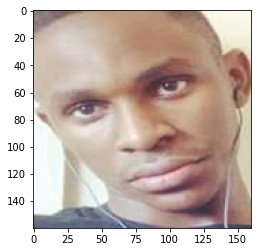

In [7]:
pyplot.imshow(image)

# Face detection using Haar Cascade

### Load image

In [8]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')
img = cv2.imread('../test.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pixels = np.asarray(img)


### Detect face

In [9]:
# Detect faces
face2 = face_cascade.detectMultiScale(img, 1.1, 4)[0]
print(face2)
x1, y1, width, height = face2
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1+height
face2 = pixels[y1:y2, x1:x2]
image2 = Image.fromarray(face2)

[ 56 131 222 222]


### Resize image

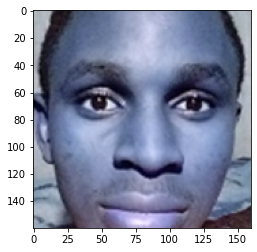

In [10]:
image2 = image2.resize((160, 160))
face_array2 = np.asarray(image2)

# Display image
pyplot.imshow(image2)

# Obtaining face embeddings

In [11]:
face_pixels = face_array2.astype('float32')

mean, std = face_pixels.mean(), face_pixels.std()
face_pixels = (face_pixels - mean) / std

In [12]:
samples = np.expand_dims(face_pixels, axis=0)

In [13]:
pred = model.predict(samples)
print(pred)
print(pred[0].shape)

[[ 1.4975648  -0.5655032  -1.6564149   0.22153531 -0.25886592 -2.244476
   0.13691853  0.8578187  -0.49747354  0.8261616  -0.236108   -0.86103463
  -0.21433854  0.6339594   0.7696755   0.31534386  0.7696713   0.4967552
  -0.89851046 -0.5330395  -0.5286688  -0.17325845 -1.0231078   1.0460402
  -0.6628893  -0.16721147 -2.2759     -0.6882093   1.6735291  -1.298056
  -3.1131265  -0.46623212 -0.7052211  -0.9284702  -1.2015095   0.23091927
  -0.96809524 -0.57467496 -0.73417974 -0.22552523 -2.013646    1.6147226
  -0.5238977   0.14589295  0.92699903  1.16347     0.60796875  0.5350979
  -0.51308644  1.5766025   0.08901322 -0.22297709  0.65950763  0.82194555
  -0.941953   -0.15340497 -0.86801696 -0.31535223 -0.02174548 -1.1846285
   0.23059401  1.2714341  -0.6851418  -0.02160729 -0.08061477 -0.33910918
   0.17609064  1.9024705   1.0050199   1.5858499  -0.44808504  0.55205923
  -0.15962912  0.7654193  -0.02292507 -1.1443433  -0.5140616   0.897472
  -0.398699    0.3762604   1.3906536   2.0638912 

In [14]:
face_pixels2 = face_array2.astype('float32')

mean, std = face_pixels2.mean(), face_pixels2.std()
face_pixels2 = (face_pixels2 - mean) / std

In [15]:
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1,
    reduction=tf.keras.losses.Reduction.SUM)

In [16]:
cosine_loss(pred, pred).numpy()

-1.0000001

In [17]:
from scipy.spatial import distance

In [18]:
distance.euclidean(pred, pred2)

NameError: name 'pred2' is not defined